<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 40px; border-radius: 15px; text-align: center; box-shadow: 0 10px 30px rgba(0,0,0,0.3);'>
    <h1 style='color: white; font-size: 48px; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);'>⚡ AdaBoost Algorithm</h1>
    <h2 style='color: #f0f0f0; font-size: 28px; margin-top: 10px;'>Adaptive Boosting - The Sequential Powerhouse</h2>
    <p style='color: white; font-size: 18px; margin-top: 20px;'>From Weak Learners to Strong Learner 🚀</p>
</div>

---

# 📚 Table of Contents

1. [🎯 Introduction to AdaBoost](#intro)
2. [🔄 Bagging vs Boosting Revision](#bagging-boosting)
3. [🌲 Decision Trees - Bias-Variance](#decision-trees)
4. [✂️ Decision Tree Stumps](#stumps)
5. [🧮 AdaBoost Core Function](#core-function)
6. [📋 Complete Algorithm Walkthrough](#algorithm)
7. [📊 Final Prediction](#prediction)
8. [💡 Key Concepts & Formulas](#key-concepts)
9. [❓ Interview Questions](#interview)

<a id='intro'></a>
# 🎯 Introduction to AdaBoost

<div style="background-color: #E8F1FF; padding: 20px; border-left: 6px solid #2563EB; border-radius: 8px; margin: 20px 0;">
    <h3 style="color: #1E3A8A; margin-top: 0;">📖 Definition</h3>
    <p style="font-size: 16px; line-height: 1.6; color: #1F2937;">
        <strong>AdaBoost (Adaptive Boosting)</strong> is a 
        <strong style="color: #7C3AED;">boosting ensemble technique</strong> 
        that combines multiple <em>weak learners</em> sequentially to create a 
        <em>strong learner</em>.
    </p>
    <div style="background-color: #F1EDFF; padding: 15px; border-radius: 6px; margin-top: 15px; text-align: center;">
        <strong style="font-size: 18px; color: #4C1D95;">
            Weak Learners + Sequential Training = Strong Learner!
        </strong>
    </div>
</div>


## 🌳 The Boosting Family

```
                    ┌─────────────────┐
                    │    BOOSTING     │
                    └────────┬────────┘
                             │
            ┌────────────────┼────────────────┐
            │                │                │
      ┌─────▼─────┐    ┌────▼─────┐    ┌────▼──────┐
      │ AdaBoost  │    │ Gradient │    │  XGBoost  │
      │ Adaptive  │    │ Boosting │    │ Extreme   │
      │ Boosting  │    │          │    │ Gradient  │
      └───────────┘    └──────────┘    └───────────┘
           ✓
      (We're Here!)
```

<div style="background-color: #FFF7ED; padding: 20px; border-left: 6px solid #F59E0B; border-radius: 8px; margin: 20px 0;">
    <h3 style="color: #92400E; margin-top: 0;">⚡ Key Characteristics</h3>
    <table style="width: 100%; border-collapse: collapse; color: #1F2937;">
        <tr>
            <td style="padding: 10px;">✅ <strong>Sequential Training</strong></td>
            <td style="padding: 10px;">✅ <strong>Uses Weak Learners</strong></td>
        </tr>
        <tr>
            <td style="padding: 10px;">✅ <strong>Focus on Errors</strong></td>
            <td style="padding: 10px;">✅ <strong>Weighted Voting</strong></td>
        </tr>
        <tr>
            <td style="padding: 10px;">✅ <strong>Classification &amp; Regression</strong></td>
            <td style="padding: 10px;">✅ <strong>Decision Tree Stumps</strong></td>
        </tr>
    </table>
</div>


---
<a id='bagging-boosting'></a>
# 🔄 Bagging vs Boosting - Quick Revision

<div style='background-color: #fce4ec; padding: 20px; border-left: 5px solid #E91E63; border-radius: 5px;'>
    <h3 style='color: #C2185B; margin-top: 0;'>🔑 Essential Differences</h3>
</div>

| **Aspect** | **BAGGING** 📦 | **BOOSTING** ⚡ |
|------------|----------------|------------------|
| **Learner Type** | Base Learners (Strong) | Weak Learners |
| **Training** | <span style='color: #4CAF50;'>**Parallel**</span> | <span style='color: #F44336;'>**Sequential**</span> |
| **Connection** | Independent | Dependent (chained) |
| **Focus** | Random Sampling | Misclassified Records |
| **Main Goal** | Reduce Variance | Reduce Bias |
| **Aggregation** | Equal Weights | Weighted Combination |
| **Example** | Random Forest | AdaBoost |

## 🎨 Visual Comparison

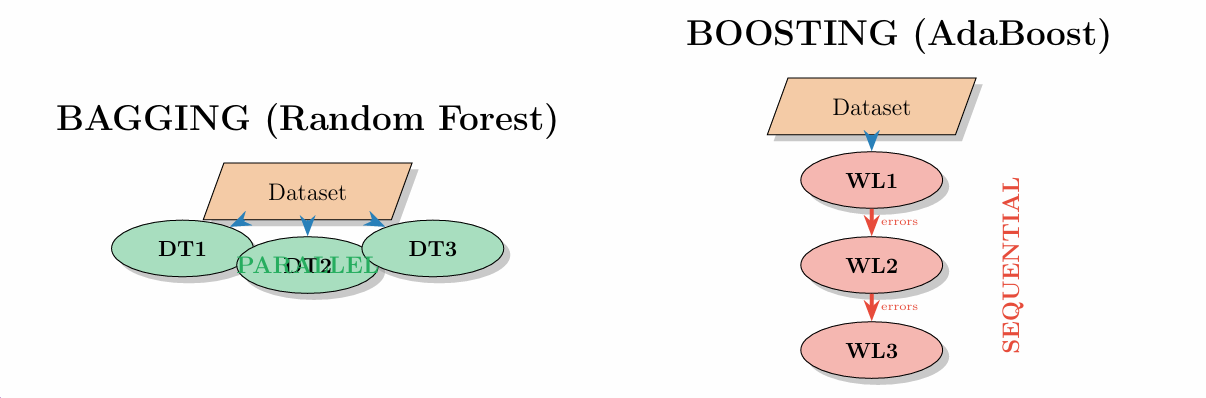

---
<a id='decision-trees'></a>
# 🌲 Decision Trees - Bias-Variance Recap

<div style="background-color: #FEEFF2; padding: 20px; border-left: 6px solid #E11D48; border-radius: 8px;">
    <h3 style="color: #9F1239; margin-top: 0;">⚠️ The Decision Tree Problem</h3>
    <p style="font-size: 16px; color: #1F2937;">
        When we create a decision tree to its <strong>complete depth</strong>:
    </p>
</div>


```
                    ○ Root
                   ╱ ╲
                  ○   ○
                 ╱╲   ╱╲
                ○ ○  ○ ○
               ╱╲ ╱╲ ╱╲ ╱╲
              ... ... ... ...

         ⚠️ Complete Depth = OVERFITTING!
```

<div style='display: flex; justify-content: space-around; margin: 20px 0;'>
    <div style='background-color: #c8e6c9; padding: 15px; border-radius: 10px; width: 45%; text-align: center;'>
        <h4 style='color: #2E7D32;'>Training Accuracy</h4>
        <h2 style='color: #1B5E20; margin: 10px 0;'>HIGH ⬆️</h2>
    </div>
    <div style='background-color: #ffcdd2; padding: 15px; border-radius: 10px; width: 45%; text-align: center;'>
        <h4 style='color: #C62828;'>Test Accuracy</h4>
        <h2 style='color: #B71C1C; margin: 10px 0;'>LOW ⬇️</h2>
    </div>
</div>

## 📊 Bias-Variance in Different Models

| **Model** | **Bias** | **Variance** | **Problem** |
|-----------|----------|--------------|-------------|
| **Deep Decision Tree** | <span style='color: #4CAF50;'>Low</span> | <span style='color: #F44336;'>High</span> | Overfitting |
| **Random Forest** | <span style='color: #4CAF50;'>Low</span> | <span style='color: #4CAF50;'>Low</span> | <span style='color: #4CAF50;'>**Ideal!**</span> |
| **Decision Stump** | <span style='color: #F44336;'>High</span> | <span style='color: #4CAF50;'>Low</span> | Underfitting |
| **AdaBoost** | <span style='color: #4CAF50;'>Low</span> | <span style='color: #F44336;'>High</span> | Needs Tuning |

---
<a id='stumps'></a>
# ✂️ Decision Tree Stumps

<div style="background-color: #E8F2FF; padding: 20px; border-left: 6px solid #2563EB; border-radius: 8px;">
    <h3 style="color: #1E3A8A; margin-top: 0;">📖 What is a Decision Tree Stump?</h3>
    <p style="font-size: 16px; line-height: 1.6; color: #1F2937;">
        A <strong>Decision Tree Stump</strong> is a decision tree with 
        <strong style="color: #7C3AED;">ONLY ONE LEVEL</strong> of depth.
    </p>
    <p style="text-align: center; font-style: italic; color: #475569; margin-top: 15px;">
        "The weakest possible decision tree!"
    </p>
</div>


```
            ┌─────────────────────┐
            │  Salary ≤ 50K?      │  ← Root (Depth = 0)
            └──────────┬──────────┘
                       │
              ┌────────┴────────┐
              │                 │
         ┌────▼────┐      ┌────▼────┐
         │   YES   │      │   NO    │  ← Leaves (Depth = 1)
         │ 2Y, 2N  │      │ 2Y, 1N  │
         └─────────┘      └─────────┘

         Decision Tree Stump : Depth = 1 Only!
```

<div style="background-color: #FDF2F8; padding: 20px; border-left: 6px solid #DB2777; border-radius: 8px;">
    <h3 style="color: #9D174D; margin-top: 0;">🔑 Why Stumps are Weak Learners</h3>
    <ul style="font-size: 16px; line-height: 1.8; color: #1F2937;">
        <li>✂️ <strong>Depth = 1:</strong> Only one decision node</li>
        <li>🧠 <strong>Limited Learning:</strong> Cannot capture complex patterns</li>
        <li>📉 <strong>Underfitting:</strong>
            <ul>
                <li>Training Accuracy: <span style="color: #DC2626;">LOW</span> (e.g., 40%)</li>
                <li>Test Accuracy: May be slightly higher (e.g., 45%)</li>
            </ul>
        </li>
        <li>⚖️ <strong>Bias-Variance:</strong> 
            <span style="background-color: #FEE2E2; color: #7F1D1D; padding: 3px 8px; border-radius: 4px;">
                High Bias
            </span> 
            + 
            <span style="background-color: #DCFCE7; color: #14532D; padding: 3px 8px; border-radius: 4px;">
                Low Variance
            </span>
        </li>
        <li>👥 <strong>Combination Power:</strong> 
            <em style="color: #4C1D95;">
                Multiple Weak Stumps Together = Strong Learner!
            </em>
        </li>
    </ul>
</div>


---
<a id='core-function'></a>
# 🧮 AdaBoost - The Core Function

<div style="background-color: #F5F3FF; padding: 25px; border-left: 6px solid #7C3AED; border-radius: 8px;">
    <h3 style="color: #4C1D95; margin-top: 0;">🧮 AdaBoost Mathematical Model</h3>
    <p style="font-size: 16px; color: #1F2937;">
        The AdaBoost function is a <strong>weighted combination</strong> of weak learners:
    </p>
</div>


## AdaBoost Function in Mathematical Form

$$
F(x) = \alpha_1 \cdot M_1 + \alpha_2 \cdot M_2 + \alpha_3 \cdot M_3 + \ldots + \alpha_n \cdot M_n
$$

**Where:**

- $M_1, M_2, \ldots, M_n$ = **Decision Tree Stumps (Weak Learners)**
- $\alpha_1, \alpha_2, \ldots, \alpha_n$ = **Weights assigned to each stump**
- $F(x)$ = **Final Strong Learner**


<div style='background-color: #c8e6c9; padding: 20px; border-radius: 10px; text-align: center; margin: 20px 0;'>
    <h3 style='color: #1B5E20; margin: 0;'>💡 Key Insight</h3>
    <p style='font-size: 18px; margin: 10px 0; color: #2E7D32;'>
        <strong>Weights are NOT equal!</strong><br>
        Better performing stumps get higher weights!
    </p>
</div>

## 🆚 Difference from Random Forest

| **Random Forest** 🌳 | **AdaBoost** ⚡ |
|----------------------|------------------|
| Majority Voting (Equal Weights) | Weighted Voting |
| All trees have equal weight | Better stumps have more weight |
| Parallel Training | Sequential Training |
| Output = mode(M₁, M₂, ...) | Output = Σ αᵢ · Mᵢ |

---
<a id='algorithm'></a>
# 📋 AdaBoost Algorithm - Complete Walkthrough

<div style='background-color: #fff3e0; padding: 20px; border-left: 5px solid #FF9800; border-radius: 5px;'>
    <h3 style='color: #E65100; margin-top: 0;'>📊 Sample Dataset - Credit Card Approval</h3>
</div>

| **Salary** | **Credit Score** | **Approval** |
|------------|------------------|-------------|
| ≤ 50K | Good | <span style='color: #4CAF50;'>✅ Yes</span> |
| ≤ 50K | Bad | <span style='color: #F44336;'>❌ No</span> |
| ≤ 50K | Normal | <span style='color: #F44336;'>❌ No</span> |
| > 50K | Good | <span style='color: #4CAF50;'>✅ Yes</span> |
| > 50K | Normal | <span style='color: #4CAF50;'>✅ Yes</span> |
| > 50K | Bad | <span style='color: #F44336;'>❌ No</span> |
| ≤ 50K | Good | <span style='color: #4CAF50;'>✅ Yes</span> |

**Total Records:** 7

---
## 🔷 STEP 1: Create Decision Tree Stumps

<div style="background-color: #E8F2FF; padding: 15px; border-left: 6px solid #2563EB; border-radius: 8px;">
    <h4 style="color: #1E3A8A; margin-top: 0;">🎯 Goal</h4>
    <p style="color: #1F2937;">
        Create stumps for each feature and select the best one using 
        <strong style="color:#7C3AED;">Entropy</strong> or 
        <strong style="color:#2563EB;">Gini Index</strong>.
    </p>
</div>


### 🌳 Stump 1: Salary Feature

```
        ┌───────────────────┐
        │  Salary ≤ 50K?    │
        └─────────┬─────────┘
                  │
          ┌───────┴───────┐
          │               │
     ┌────▼────┐     ┌───▼─────┐
     │   YES   │     │   NO    │
     │ 2Y, 2N  │     │ 2Y, 1N  │
     └─────────┘     └─────────┘

   ⚠️ Impure Split! (50%-50%)
```

### 🌳 Stump 2: Credit Score Feature

```
        ┌───────────────────┐
        │  Credit = Good?   │
        └─────────┬─────────┘
                  │
          ┌───────┴───────┐
          │               │
     ┌────▼────┐     ┌───▼─────┐
     │   YES   │     │   NO    │
     │ 3Y, 0N  │     │ 1Y, 3N  │
     └─────────┘     └─────────┘
          ↑
     Pure Split!

   ✅ Better Split! SELECTED!
```

<div style='background-color: #c8e6c9; padding: 15px; border-radius: 5px; margin: 15px 0;'>
    <h4 style='color: #2E7D32; margin-top: 0;'>✅ Selection Criteria</h4>
</div>



**Entropy Formula:**

$$
\text{Entropy} = - \sum_{i=1}^{c} p_i \log_2(p_i)
$$

**For Stump 1 (Salary):**

- Left: 2Y, 2N → 50%–50% → **Entropy = 1** ⚠️ (Maximum impurity)
- Right: 2Y, 1N → Still impure

**For Stump 2 (Credit):**

- Left: 3Y, 0N → **Pure** → **Entropy = 0** ✅
- Right: 1Y, 3N → Better than Stump 1

>**Winner:** 🏆 **Credit Score Stump**


---
## 🔷 STEP 2: Calculate Total Error & Performance

### 2A: Assign Initial Sample Weights

<div style="background-color: #E8F2FF; padding: 15px; border-radius: 8px; border-left: 6px solid #2563EB;">
    <p style="margin: 0; color: #1F2937;">
        All records get <strong style="color:#1E3A8A;">equal initial weights</strong>.
    </p>
    <p style="margin: 10px 0 0 0; color: #1F2937;">
        Since we have <strong style="color:#2563EB;">7 records</strong>:
    </p>
</div>




$$
\text{Sample Weight} = \frac{1}{7} \text{ for each record}
$$


| **Salary** | **Credit** | **Approval** | **Weight** |
|------------|------------|--------------|------------|
| ≤ 50K | Good | Yes | 1/7 |
| ≤ 50K | Bad | No | 1/7 |
| ≤ 50K | Normal | No | 1/7 |
| > 50K | Good | Yes | 1/7 |
| <span style='background-color: #86333bff; padding: 2px 5px;'>**> 50K**</span> | <span style='background-color: #86333bff; padding: 2px 5px;'>**Normal**</span> | <span style='background-color: #86333bff; padding: 2px 5px;'>**Yes**</span> | <span style='background-color: #86333bff; padding: 2px 5px;'>**1/7**</span> |
| > 50K | Bad | No | 1/7 |
| ≤ 50K | Good | Yes | 1/7 |

<p style='text-align: center; color: #D32F2F; margin-top: 10px;'>⚠️ Row 5 highlighted - this is our misclassified point!</p>

### 2B: Identify Misclassified Records

<div style="background-color: #FFF7ED; padding: 15px; border-radius: 8px; border-left: 6px solid #F59E0B;">
    <h4 style="color: #92400E; margin-top: 0;">🔍 Analysis</h4>
    <ul style="line-height: 1.8; color:#1F2937;">
        <li><strong>Stump Prediction:</strong> Credit = Good → Yes</li>
        <li>When Credit = Good: We predict <span style="color: #16A34A;">✅ Yes</span></li>
        <li>When Credit ≠ Good: We predict <span style="color: #DC2626;">❌ No</span></li>
        <li><strong style="color: #B91C1C;">Error:</strong> Row 5 has Credit = Normal (not Good) but Approval = Yes</li>
    </ul>
</div>


<div style='background-color: #ffcdd2; padding: 15px; border-radius: 5px; text-align: center; margin: 15px 0;'>
    <strong style='color: #C62828; font-size: 18px;'>⚠️ Misclassified Record: Row 5 (>50K, Normal, Yes)</strong>
</div>

### 2C: Calculate Total Error

**Total Error Formula:**
$$
\epsilon = \sum_{\text{wrong predictions}} w_i
$$

**Calculation:**
$$
\begin{align*}
\text{Total Error} &= \frac{1}{7} \text{ (only 1 wrong record)}\\
&= 0.143
\end{align*}
$$

<div style='background-color: #fff3e0; padding: 20px; border-radius: 10px; text-align: center; margin: 20px 0; border: 2px solid #FF9800;'>
    <h3 style='color: #E65100; margin: 0;'>Total Error = 0.143</h3>
</div>

### 2D: Calculate Performance of Stump

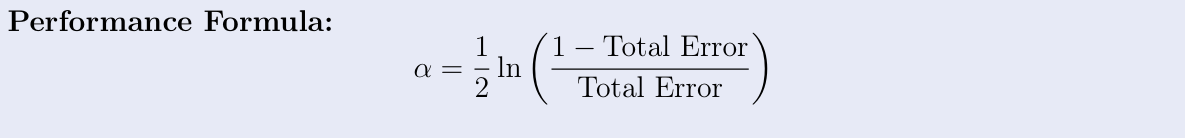

**Performance Formula:**
$$
\alpha = \frac{1}{2} \ln\left(\frac{1 - \epsilon}{\epsilon}\right)
$$ 

**Calculation:**
$$
\begin{align*}
\alpha_1 &= \frac{1}{2} \ln\left(\frac{1 - 0.143}{0.143}\right)\\
&= \frac{1}{2} \ln\left(\frac{0.857}{0.143}\right)\\
&= \frac{1}{2} \ln(6)\\
&= \frac{1}{2} \times 1.79\\
&\approx 0.896
\end{align*}
$$


<div style="background-color: #ECFDF5; padding: 20px; border-radius: 12px; text-align: center; margin: 20px 0; border: 2px solid #22C55E;">
    <h3 style="color: #166534; margin: 0;">Performance (α₁) = 0.896 🎯</h3>
    <p style="margin: 10px 0 0 0; font-style: italic; color: #14532D;">
        This is the weight for our first stump!
    </p>
</div>


<div style="background-color: #F5F3FF; padding: 15px; border-radius: 8px; margin: 15px 0; border-left: 6px solid #7C3AED;">
    <h4 style="color: #4C1D95; margin-top: 0;">💡 Understanding Performance Value</h4>
    <ul style="line-height: 1.8; color:#1F2937;">
        <li>α₁ = 0.896 is the <strong>weight</strong> assigned to Stump 1</li>
        <li>Higher α = Better performance = More influence in final prediction</li>
        <li>
            This weight will be used in the final AdaBoost function: 
            <code>F(x) = 0.896 · M₁ + α₂ · M₂ + ...</code>
        </li>
        <li>
            <strong>Range:</strong> α can be positive or negative
            <ul>
                <li style="color:#166534;">Positive: Model agrees with majority</li>
                <li style="color:#9F1239;">Negative: Model disagrees (very rare)</li>
            </ul>
        </li>
    </ul>
</div>


---
## 🔷 STEP 3: Update Weights

<div style="background-color: #E8F2FF; padding: 15px; border-left: 6px solid #2563EB; border-radius: 8px;">
    <h4 style="color: #1E3A8A; margin-top: 0;">🎯 Goal</h4>
    <ul style="margin: 10px 0; color:#1F2937;">
        <li><span style="color: #16A34A;">✅ Decrease</span> weights for correctly classified points</li>
        <li><span style="color: #DC2626;">⬆️ Increase</span> weights for misclassified points</li>
    </ul>
    <p style="margin: 10px 0 0 0; color:#1F2937;">
        <strong>Purpose:</strong> Make the next stump focus on previously wrong predictions!
    </p>
</div>


### 📐 Weight Update Formulas

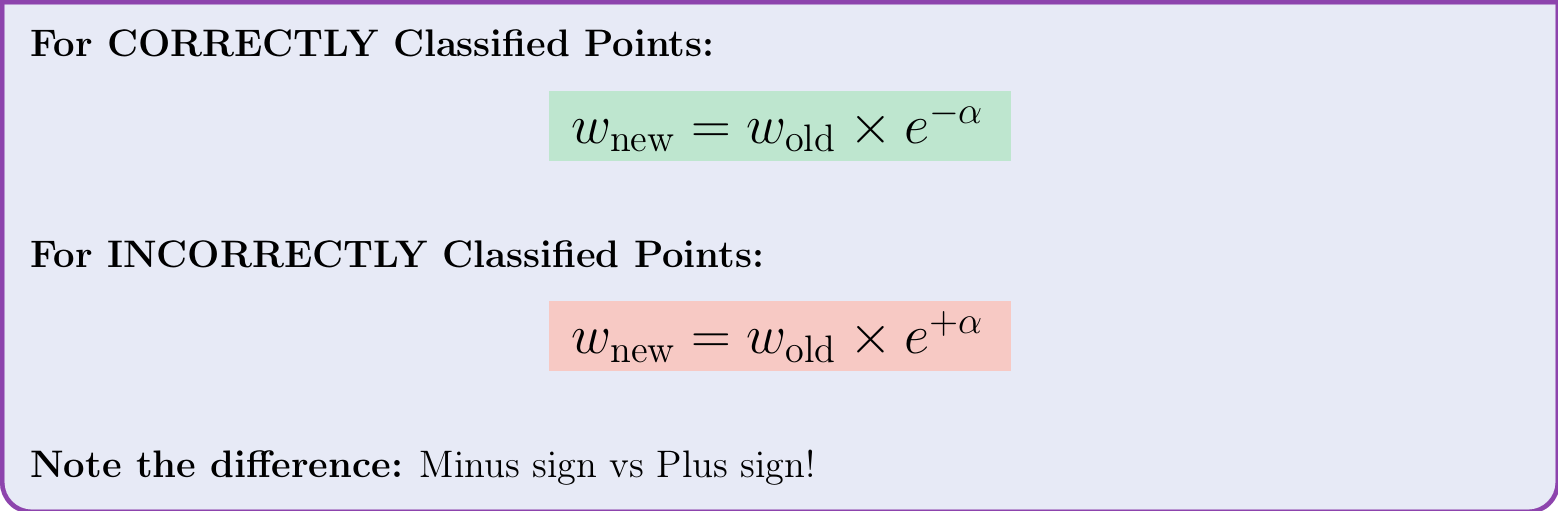
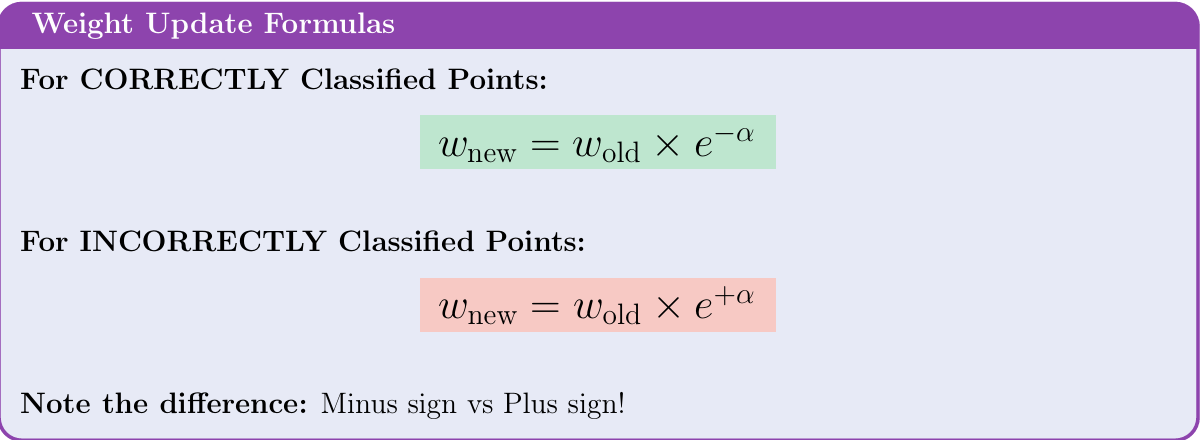

### 🧮 Calculating Updated Weights


**Given:**

$$
\alpha_1 = 0.896, \quad w_{\text{old}} = \frac{1}{7}
$$

---

#### ✅ For Correctly Classified (6 records):

$$
w_{\text{new}} = \frac{1}{7} \times e^{-0.896}
$$

$$
= \frac{1}{7} \times 0.408
$$

$$
= 0.058
$$

---

#### ❌ For Incorrectly Classified (1 record):

$$
w_{\text{new}} = \frac{1}{7} \times e^{+0.896}
$$

$$
= \frac{1}{7} \times 2.45
$$

$$
= 0.349
$$


### 📊 Updated Weights Comparison

| **Record** | **Old Weight** | **Classified** | **New Weight** | **Change** |
|------------|----------------|----------------|----------------|------------|
| 1 | 1/7 = 0.143 | <span style='color: #4CAF50;'>✅ Correct</span> | 0.058 | <span style='color: #4CAF50;'>⬇️ Decreased</span> |
| 2 | 0.143 | <span style='color: #4CAF50;'>✅ Correct</span> | 0.058 | <span style='color: #4CAF50;'>⬇️ Decreased</span> |
| 3 | 0.143 | <span style='color: #4CAF50;'>✅ Correct</span> | 0.058 | <span style='color: #4CAF50;'>⬇️ Decreased</span> |
| 4 | 0.143 | <span style='color: #4CAF50;'>✅ Correct</span> | 0.058 | <span style='color: #4CAF50;'>⬇️ Decreased</span> |
| **5** | **0.143** | <span style='color: #F44336;'>**❌ Wrong**</span> | **0.349** | <span style='color: #F44336;'>**⬆️ Increased**</span> |
| 6 | 0.143 | <span style='color: #4CAF50;'>✅ Correct</span> | 0.058 | <span style='color: #4CAF50;'>⬇️ Decreased</span> |
| 7 | 0.143 | <span style='color: #4CAF50;'>✅ Correct</span> | 0.058 | <span style='color: #4CAF50;'>⬇️ Decreased</span> |

<div style="background-color: #FFF7ED; padding: 10px; border-radius: 8px; margin-top: 10px; border-left: 6px solid #F59E0B;">
    <strong style="color:#92400E;">📌 Observation:</strong>
    <ul style="margin: 5px 0; color:#1F2937;">
        <li>Correct records: Weight decreased from <strong>0.143</strong> to <strong style="color:#16A34A;">0.058</strong></li>
        <li>Wrong record: Weight increased from <strong>0.143</strong> to <strong style="color:#DC2626;">0.349</strong></li>
        <li>
            The wrong record now has 
            <strong style="color:#B91C1C;">~6× more weight!</strong>
        </li>
    </ul>
</div>


---
## 🔷 STEP 4: Normalize Weights

<div style="background-color: #E8F2FF; padding: 15px; border-left: 6px solid #2563EB; border-radius: 8px;">
    <h4 style="color: #1E3A8A; margin-top: 0;">⚠️ Problem</h4>
    <p style="color:#1F2937;">Sum of updated weights ≠ 1</p>
    <h4 style="color: #1E3A8A;">✅ Solution</h4>
    <p style="color:#1F2937;">Normalize so they sum to 1</p>
</div>


#### 🔄 Normalization Process

#### Step 1: Calculate Sum of Updated Weights

$$
\text{Sum} = 6 \times 0.058 + 1 \times 0.349
$$

$$
= 0.348 + 0.349
$$

$$
= 0.697
$$

---

#### Step 2: Normalize Each Weight

$$
w_{\text{normalized}} = \frac{w_{\text{updated}}}{\text{Sum}}
$$

---

#### For Correct Records:

$$
w_{\text{normalized}} = \frac{0.058}{0.697} = 0.08
$$

---

#### For Wrong Record:

$$
w_{\text{normalized}} = \frac{0.349}{0.697} = 0.50
$$


| **Record** | **Updated Weight** | **Normalized Weight** |
|------------|--------------------|-----------------------|
| 1-4, 6-7 (Correct) | 0.058 | **0.08** |
| 5 (Wrong) | 0.349 | **0.50** |
| **Total Sum** | 0.697 | **1.0** ✅ |

---
## 🔷 STEP 5: Bin Assignment

<div style="background-color: #E8F2FF; padding: 15px; border-left: 6px solid #2563EB; border-radius: 8px;">
    <h4 style="color: #1E3A8A; margin-top: 0;">🎯 Goal</h4>
    <p style="color:#1F2937;">
        Create ranges based on normalized weights to select records for next stump
    </p>
    <h4 style="color: #1E3A8A;">📏 Method</h4>
    <p style="color:#1F2937;">
        Cumulative sum of weights
    </p>
</div>


### 📊 Bin Visualization

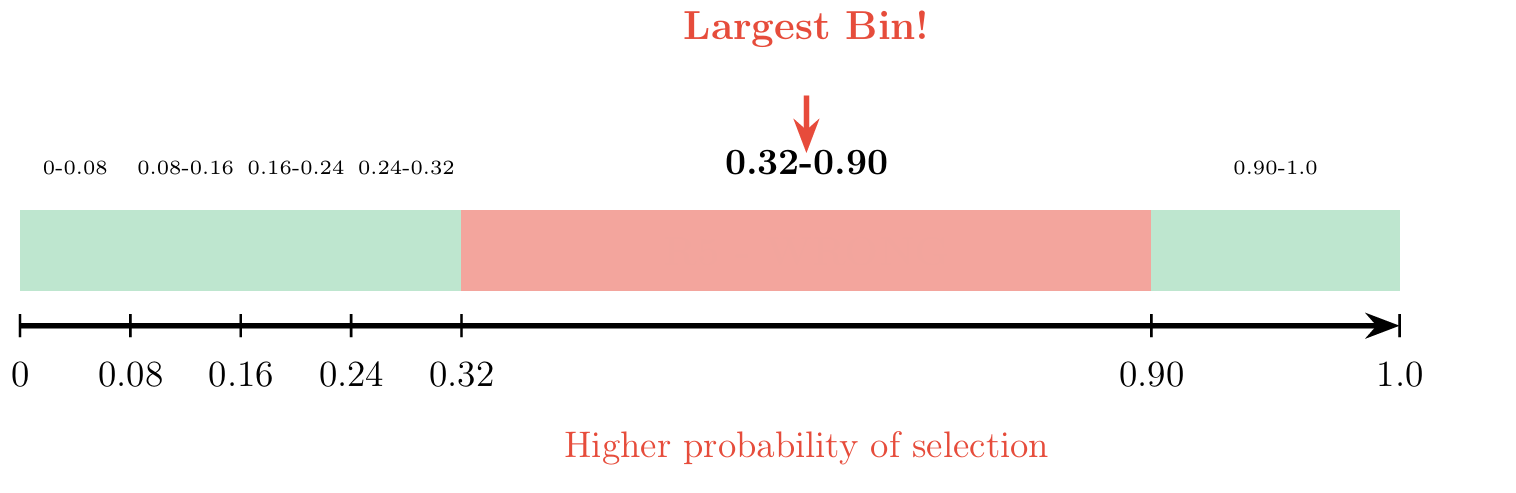

| Record | Range       | Size | Probability |
|--------|-------------|------|-------------|
| R1     | 0.00–0.08   | 0.08 | 8%          |
| R2     | 0.08–0.16   | 0.08 | 8%          |
| R3     | 0.16–0.24   | 0.08 | 8%          |
| R4     | 0.24–0.32   | 0.08 | 8%          |
| R5 (Wrong) | 0.32–0.90 | 0.58 | 58%         |
| R6     | 0.90–1.00   | 0.08 | 8%          |


<div style="background-color: #F5F3FF; padding: 15px; border-radius: 8px; margin: 15px 0; border-left: 6px solid #7C3AED;">
    <h4 style="color: #4C1D95; margin-top: 0;">💡 Understanding Bins</h4>
    <ul style="line-height: 1.8; color:#1F2937;">
        <li>Each bin represents a record</li>
        <li>Bin size = Normalized weight</li>
        <li>
            <strong style="color: #DC2626;">Record 5 (Wrong):</strong> Has the largest bin (0.32 to 0.90)
            <ul>
                <li style="color:#1F2937;">Size = <strong>0.58</strong> (58% of total range!)</li>
                <li style="color:#1F2937;">Much higher chance of being selected</li>
            </ul>
        </li>
        <li>
            <strong style="color: #16A34A;">Correct Records:</strong> Small bins (0.08 each) – Lower chance
        </li>
        <li>
            <strong>Purpose:</strong> 
            <span style="color:#2563EB;">Biased sampling toward errors! 🎯</span>
        </li>
    </ul>
</div>


---
## 🔷 STEP 6: Iterative Sampling & New Dataset

<div style="background-color: #E8F2FF; padding: 15px; border-left: 6px solid #2563EB; border-radius: 8px;">
    <h4 style="color: #1E3A8A; margin-top: 0;">🎲 Method</h4>
    <p style="color:#1F2937;">
        Generate random numbers between 0 and 1, select records based on bins
    </p>
    <h4 style="color: #1E3A8A;">🔁 Repeat</h4>
    <p style="color:#1F2937;">
        Until we have same number of records as original dataset (7 records)
    </p>
</div>


| Iteration | Random # | Bin Range | Record | Data               |
|-----------|----------|-----------|--------|--------------------|
| 1         | 0.50     | 0.32–0.90 | 5      | >50K, Normal, Yes  |
| 2         | 0.10     | 0.08–0.16 | 2      | ≤50K, Bad, No    |
| 3         | 0.60     | 0.32–0.90 | 5      | >50K, Normal, Yes  |
| 4         | 0.75     | 0.32–0.90 | 5      | >50K, Normal, Yes  |
| 5         | 0.24     | 0.16–0.24 | 3      | ≤50K, Normal, No   |
| 6         | 0.32     | 0.24–0.32 | 4      | >50K, Good, Yes      |
| 7         | 0.87     | 0.32–0.90 | 5      | >50K, Normal, Yes  |


<div style="background-color: #FFF7ED; padding: 15px; border-radius: 8px; margin: 15px 0; border-left: 6px solid #F59E0B;">
    <h4 style="color: #92400E; margin-top: 0;">📊 Observation</h4>
    <ul style="line-height: 1.8; color:#1F2937;">
        <li>
            Record 5 (wrong prediction) selected 
            <strong style="color: #DC2626;">4 times!</strong> (57%)
        </li>
        <li>Other records selected only once each</li>
        <li>
            This is exactly what we wanted – 
            <strong style="color:#2563EB;">focus on errors!</strong> 🎯
        </li>
    </ul>
</div>


### 📋 New Dataset for Stump 2

>This Dataset will train the next decision tree stump!



| Index | Salary | Credit | Approval |
|-------|--------|--------|----------|
| 0 | >50K | Normal | Yes |
| 1 | ≤50K | Bad | No |
| 2 | >50K | Normal | Yes |
| 3 | >50K | Normal | Yes |
| 4 | ≤50K | Normal | No |
| 5 | >50K | Good | Yes |
| 6 | >50K | Normal | Yes |

**Total Records:** 7


---
## 🔷 STEP 7: Repeat the Process

<div style='background-color: #c8e6c9; padding: 20px; border-radius: 5px;'>
    <h3 style='color: #2E7D32; margin-top: 0;'>🔄 Complete Iterative Process</h3>
    <p style='font-size: 16px;'>The entire process repeats for Stump 2, Stump 3, ..., Stump N</p>
</div>

**For Stump 2:**

1. 📊 **New Dataset:** Use sampled records from Step 6
2. ⚖️ **Reset Weights:** Assign equal weights again (w = 1/7 for all)
3. 🌳 **Create Stumps:** Try different features
4. ✅ **Select Best:** Using Entropy/Gini
5. 🧮 **Calculate Error:** Find misclassified records
6. ⚡ **Performance:** Calculate α₂
7. 📈 **Update Weights:** For correct/incorrect
8. 🔄 **Normalize:** Make weights sum to 1
9. 📦 **Create Bins:** For next iteration
10. 🎲 **Sample:** Select records for Stump 3

**Continue until:** N stumps created (default: N = 100)

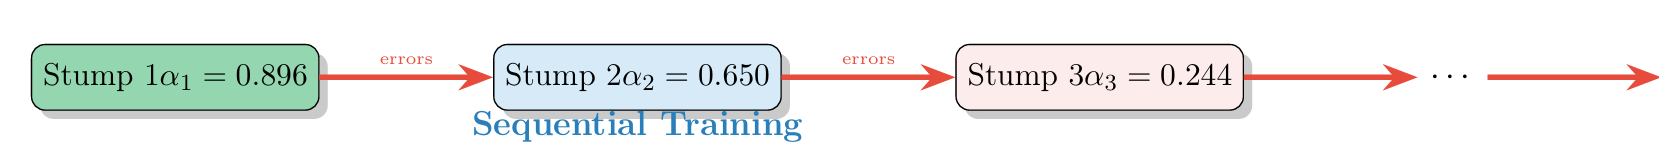

---
<a id='prediction'></a>
# 📊 Final Prediction - How AdaBoost Decides

<div style="background-color: #E8F2FF; padding: 15px; border-left: 6px solid #2563EB; border-radius: 8px;">
    <h3 style="color: #1E3A8A; margin-top: 0;">🎯 Making Predictions with AdaBoost</h3>
    <ul style="font-size: 16px; line-height: 1.8; color:#1F2937;">
        <li><strong>Input:</strong> New test data</li>
        <li><strong>Process:</strong> Pass through all stumps, get weighted votes</li>
        <li>
            <strong>Output:</strong> Combine using weights, 
            <span style="color: #DC2626;">NOT majority voting!</span>
        </li>
    </ul>
</div>


## 🏷️ Classification Example

<div style="background-color: #FFF7ED; padding: 15px; border-radius: 8px; border-left: 6px solid #F59E0B;">
    <h4 style="color: #92400E; margin-top: 0;">📝 Test Data</h4>
    <p style="font-size: 16px; color:#1F2937;">
        Salary ≤ 50K, Credit = Good
    </p>
</div>


| **Stump** | **Weight (α)** | **Prediction** | **Weighted Vote** |
|-----------|----------------|----------------|-------------------|
| Stump 1 | 0.896 | <span style='color: #4CAF50;'>Yes</span> | +0.896 |
| Stump 2 | 0.650 | <span style='color: #F44336;'>No</span> | -0.650 |
| Stump 3 | 0.244 | <span style='color: #4CAF50;'>Yes</span> | +0.244 |
| Stump 4 | -0.300 | <span style='color: #F44336;'>No</span> | +0.300 |

### 🧮 AdaBoost Function

$$
F(x) = \alpha_1 M_1 + \alpha_2 M_2 + \alpha_3 M_3 + \alpha_4 M_4
$$

---

#### For **Yes** class:

$$
\text{Score}_{Yes} = 0.896 + 0.244 = 1.140
$$

---

#### For **No** class:

$$
\text{Score}_{No} = 0.65 + (-0.3) = 0.350
$$

---

#### ✅ Final Comparison

$$
\text{Score}_{Yes} \; (1.140) \; > \; \text{Score}_{No} \; (0.350)
$$

---

### 🎉 Final Prediction: **YES**  
#### 💳 Credit Card Approved!


```
                    Test Data
                 (Salary≤50K, Good)
                        │
            ┌───────────┼───────────┐
            │           │           │
       ┌────▼───┐  ┌───▼────┐  ┌───▼────┐  ┌────▼────┐
       │Stump 1 │  │Stump 2 │  │Stump 3 │  │Stump 4  │
       │α=0.896 │  │α=0.650 │  │α=0.244 │  │α=-0.300 │
       └────┬───┘  └───┬────┘  └───┬────┘  └────┬────┘
            │          │           │            │
        ┌───▼──┐   ┌───▼──┐    ┌──▼───┐    ┌───▼──┐
        │ YES  │   │  NO  │    │ YES  │    │  NO  │
        │+0.896│   │ 0.650│    │+0.244│    │-0.300│
        └───┬──┘   └───┬──┘    └──┬───┘    └───┬──┘
            │          │           │            │
            └──────────┼───────────┼────────────┘
                       │           │
                   Yes: 1.140  No: 0.350
                       │
                ┌──────▼──────┐
                │   Winner:   │
                │     YES     │
                │      ✅     │
                └─────────────┘
```

<div style="background-color: #FDF2F8; padding: 20px; border-radius: 8px; margin: 20px 0; border-left: 6px solid #DB2777;">
    <h3 style="color: #9D174D; margin-top: 0;">🔑 Classification Key Takeaways</h3>
    <ul style="font-size: 16px; line-height: 1.8; color:#1F2937;">
        <li>🔑 <strong>NOT Majority Voting:</strong> We don't count votes equally</li>
        <li>🔑 <strong>Weighted Voting:</strong> Each stump's vote is multiplied by its performance (α)</li>
        <li>
            🔑 <strong>Sign Convention:</strong>
            <ul>
                <li style="color:#166534;">Prediction = "Yes" → Add +α</li>
                <li style="color:#9F1239;">Prediction = "No" → Add -α (or keep negative)</li>
            </ul>
        </li>
        <li>🔑 <strong>Final Decision:</strong> Highest weighted score wins</li>
        <li>
            🔑 <strong>Better Stumps Matter More:</strong> 
            <span style="color:#2563EB;">Higher α = more influence</span>
        </li>
    </ul>
</div>


## 📈 Regression Problem

<div style="background-color: #E8F2FF; padding: 15px; border-radius: 8px; border-left: 6px solid #2563EB;">
    <h4 style="color: #1E3A8A; margin-top: 0;">🔄 Differences from Classification</h4>
    <ol style="font-size: 16px; line-height: 1.8; color:#1F2937;">
        <li>Use <strong style="color:#7C3AED;">Mean Squared Error (MSE)</strong> instead of Entropy/Gini</li>
        <li>Predictions are <strong style="color:#2563EB;">continuous values</strong></li>
        <li>Weighted combination produces <strong style="color:#059669;">continuous output</strong></li>
    </ol>
</div>


## 📈 Regression Prediction

Each stump predicts a continuous value:

| Stump   | Weight        | Prediction |
|---------|---------------|------------|
| Stump 1 | α₁ = 0.896    | 45.2       |
| Stump 2 | α₂ = 0.650    | 52.1       |
| Stump 3 | α₃ = 0.244    | 48.7       |

---

### Final Prediction:

$$
F(x) = \alpha_1 \cdot \text{Pred}_1 + \alpha_2 \cdot \text{Pred}_2 + \alpha_3 \cdot \text{Pred}_3
$$

$$
= 0.896 \times 45.2 + 0.650 \times 52.1 + 0.244 \times 48.7
$$

$$
= 40.5 + 33.9 + 11.9
$$

$$
= 86.3
$$

---

## ✅ Final Prediction = **86.3**
---

### 🔄Classification Vs Regression

| **Aspect** | **Classification** | **Regression** |
|------------|-------------------|----------------|
| **Stump Selection** | Entropy / Gini Index | Mean Squared Error |
| **Predictions** | Discrete (Yes/No, 0/1) | Continuous (45.2, 52.1) |
| **Aggregation** | Weighted voting | Weighted average |
| **Final Output** | Class with max score | Weighted sum |

---
<a id='key-concepts'></a>
# 💡 Key Concepts - Quick Revision

<div style='background-color: #fce4ec; padding: 25px; border-left: 5px solid #E91E63; border-radius: 5px;'>
    <h2 style='color: #C2185B; margin-top: 0;'>📐 Must-Remember Formulas</h2>
</div>



### 1. Total Error:

$$
\epsilon = \sum_{\text{wrong predictions}} w_i
$$

---

### 2. Stump Performance (Weight):

$$
\alpha = \frac{1}{2} \ln\left(\frac{1 - \epsilon}{\epsilon}\right)
$$

---

### 3. Weight Update – Correct Prediction:

$$
w_{\text{new}} = w_{\text{old}} \times e^{-\alpha}
$$

---

### 4. Weight Update – Wrong Prediction:

$$
w_{\text{new}} = w_{\text{old}} \times e^{+\alpha}
$$

---

### 5. Normalization:

$$
w_i = \frac{w_i}{\sum_j w_j}
$$

---

### 6. Final Model:

$$
F(x) = \sum_{t=1}^{T} \alpha_t \cdot M_t(x)
$$


<div style="background-color: #ECFDF5; padding: 20px; border-radius: 8px; margin: 20px 0; border-left: 6px solid #22C55E;">
    <h3 style="color: #166534; margin-top: 0;">✅ Critical Points to Remember</h3>
    <table style="width: 100%; color:#1F2937;">
        <tr>
            <td style="padding: 10px;">✔️ Sequential training</td>
            <td style="padding: 10px;">✔️ Weak learners = Stumps</td>
        </tr>
        <tr>
            <td style="padding: 10px;">✔️ Depth = 1</td>
            <td style="padding: 10px;">✔️ Focus on errors</td>
        </tr>
        <tr>
            <td style="padding: 10px;">✔️ Weighted voting</td>
            <td style="padding: 10px;">✔️ NOT majority voting</td>
        </tr>
        <tr>
            <td style="padding: 10px;">✔️ High bias → Low bias</td>
            <td style="padding: 10px;">✔️ Default: 100 stumps</td>
        </tr>
    </table>
</div>


## 🎨 AdaBoost at a Glance

```
                        ┌─────────────┐
                        │  AdaBoost   │
                        └──────┬──────┘
                               │
        ┌──────────────────────┼──────────────────────┐
        │                      │                      │
  ┌─────▼──────┐        ┌──────▼──────┐       ┌──────▼──────┐
  │Weak Learners│       │ Sequential  │       │   Weights   │
  │Decision     │       │ Train one   │       │ Update after│
  │Stumps (D=1) │       │after another│       │ each stump  │
  └────────────┘        └─────────────┘       └─────────────┘
        │                      │                      │
        └──────────────────────┼──────────────────────┘
                               │
                        ┌──────▼──────┐
                        │Focus on     │
                        │Errors       │
                        └──────┬──────┘
                               │
                        ┌──────▼──────┐
                        │Final Model  │
                        │Weighted     │
                        │Combination  │
                        └─────────────┘
```

---
<a id='interview'></a>
# ❓ Interview Questions

<div style='background-color: #ffebee; padding: 25px; border-left: 5px solid #F44336; border-radius: 5px;'>
    <h2 style='color: #D32F2F; margin-top: 0;'>🎤 Top Interview Questions on AdaBoost</h2>
</div>

### Q1: What is AdaBoost? How does it work?

<div style="background-color: #ECFDF5; padding: 15px; border-radius: 8px; margin: 10px 0; border-left: 6px solid #22C55E;">
    <strong style="color: #166534;">Answer:</strong>
    <ul style="margin: 10px 0; line-height: 1.8; color:#1F2937;">
        <li>AdaBoost (Adaptive Boosting) is an ensemble technique</li>
        <li>Combines weak learners (decision stumps) sequentially</li>
        <li>Each stump focuses on errors of previous stump</li>
        <li>Final prediction is weighted combination</li>
        <li>Weights determined by stump performance</li>
    </ul>
</div>


### Q2: What is a decision stump?

<div style="background-color: #ECFDF5; padding: 15px; border-radius: 8px; margin: 10px 0; border-left: 6px solid #22C55E;">
    <strong style="color: #166534;">Answer:</strong>
    <ul style="margin: 10px 0; line-height: 1.8; color:#1F2937;">
        <li>Decision tree with only ONE level of depth</li>
        <li>Makes one split based on one feature</li>
        <li>Weak learner (high bias, low variance)</li>
        <li>When combined, creates strong learner</li>
    </ul>
</div>

### Q3: How is AdaBoost different from Random Forest?

<div style="background-color: #ECFDF5; padding: 15px; border-radius: 8px; margin: 10px 0; border-left: 6px solid #22C55E;">
    <strong style="color: #166534;">Answer:</strong>
    <ul style="margin: 10px 0; line-height: 1.8; color:#1F2937;">
        <li>AdaBoost: <strong>Sequential</strong>, Random Forest: <strong>Parallel</strong></li>
        <li>AdaBoost: <strong>Weak learners</strong>, RF: <strong>Strong learners</strong></li>
        <li>AdaBoost: <strong>Weighted voting</strong>, RF: <strong>Equal voting</strong></li>
        <li>AdaBoost: <strong>Focus on errors</strong>, RF: <strong>Random sampling</strong></li>
        <li>AdaBoost: <strong>Reduces bias</strong>, RF: <strong>Reduces variance</strong></li>
    </ul>
</div>

### Q4: What is the role of weights in AdaBoost?

<div style="background-color: #ECFDF5; padding: 15px; border-radius: 8px; margin: 10px 0; border-left: 6px solid #22C55E;">
    <strong style="color: #166534;">Answer:</strong>
    <ul style="margin: 10px 0; line-height: 1.8; color:#1F2937;">
        <li><strong>Two types:</strong> Sample weights and Stump weights</li>
        <li><strong>Sample weights:</strong> Increase for errors, decrease for correct</li>
        <li><strong>Stump weights (α):</strong> Based on performance</li>
        <li>Better stumps get higher weights in final model</li>
        <li>Weighted combination gives final prediction</li>
    </ul>
</div>

### Q5: Can AdaBoost overfit?

<div style="background-color: #ECFDF5; padding: 15px; border-radius: 8px; margin: 10px 0; border-left: 6px solid #22C55E;">
    <strong style="color: #166534;">Answer:</strong>
    <ul style="margin: 10px 0; line-height: 1.8; color:#1F2937;">
        <li>Yes, especially with too many stumps</li>
        <li>More prone to overfitting with noisy data</li>
        <li>Focuses heavily on outliers/errors</li>
        <li>Can be controlled by limiting number of stumps</li>
        <li>Less prone to overfitting than deep decision trees</li>
    </ul>
</div>

### Q7: Advantages and Disadvantages?

<table style="width: 100%; border-collapse: collapse; margin: 20px 0;">
    <tr>
        <td style="width: 50%; padding: 15px; vertical-align: top;">
            <div style="background-color: #ECFDF5; padding: 15px; border-radius: 12px; border-left: 6px solid #22C55E;">
                <h4 style="color: #166534; margin-top: 0;">✅ Advantages</h4>
                <ul style="line-height: 1.8; color:#1F2937;">
                    <li>High accuracy</li>
                    <li>Handles complex patterns</li>
                    <li>Reduces bias effectively</li>
                    <li>Less prone to overfitting than single deep tree</li>
                    <li>Works well with weak learners</li>
                </ul>
            </div>
        </td>
        <td style="width: 50%; padding: 15px; vertical-align: top;">
            <div style="background-color: #FFF1F2; padding: 15px; border-radius: 12px; border-left: 6px solid #F43F5E;">
                <h4 style="color: #9F1239; margin-top: 0;">❌ Disadvantages</h4>
                <ul style="line-height: 1.8; color:#1F2937;">
                    <li>Sensitive to outliers/noise</li>
                    <li>Slower training (sequential)</li>
                    <li>Can overfit with too many iterations</li>
                    <li>Less interpretable than single tree</li>
                    <li>Requires careful tuning</li>
                </ul>
            </div>
        </td>
    </tr>
</table>


<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 30px; border-radius: 15px; color: white; text-align: center;'>
    <h2 style='margin: 0; color: white;'>🗺️ Your Boosting Journey</h2>
</div>

<div style='background: linear-gradient(135deg, #f093fb 0%, #f5576c 100%); padding: 20px; border-radius: 10px; text-align: center; color: white;'>
    <h2 style='margin: 0; color: white;'>💖 Happy Learning! 💖</h2>
    <p style='margin: 10px 0; font-size: 18px;'>Practice makes perfect!</p>
</div>